# Pymaceuticals Inc

# Analysis: 

Summary: In this module we looked at data about mice with cancer and to see if Capomulin was the best drug to fight it. There were 249 mice, but one was a duplicate so we only had 248 mice in this set. Then we got the mean, median, variance, std, and SEM of each tumor per drug. Then we made a boxplot to represent the new found data. Then we made a line chart to visualize the size of the tumors for Capoumlin and foudn that they dropped over a 30 day period. Then found the correlation and regression of the weight of mouse versus the size of its tumor. 

Conclution: Ramicane and Capomulin are the two best drugs to bring down the size of a tumor. On the boxplot those two drugs have the lowest volume per tumor accross the board, but Ramicane's mean is slightly lower than Capomulin's. 
The second conclution that could affect the dataset is the size of the mouse. The larger the mouse the larger the tumor is when it starts, so it could have an effect on that dataset. Maybe a better way to measure it would be the percent of body weight the tumor takes up, rather than in mm3. Then it would eliminate that concern.

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [42]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_merged_df= merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_merged_df


array(['g989'], dtype=object)

In [43]:
cleaned_df= merged_df[merged_df['Mouse ID'].isin(dup_merged_df)==False]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [44]:
cleaned_df['Mouse ID'].nunique()

248

# Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean=cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median=cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
variance=cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()



summary_table=pd.DataFrame({"Mean Tumor Volume": mean,
                          "Median Tumor Volume":median,
                          "Variance of Tumor Volumes": variance,
                          "Standard Deviation of Tumor Volumes": std,
                          "SEM of Tumor Volumes": sem})
summary_table



,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volumes,Standard Deviation of Tumor Volumes,SEM of Tumor Volumes
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_method=cleaned_df.groupby(["Drug Regimen"])[['Tumor Volume (mm3)']].agg(['mean','median', 'var', 'std', 'sem'])
agg_method


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

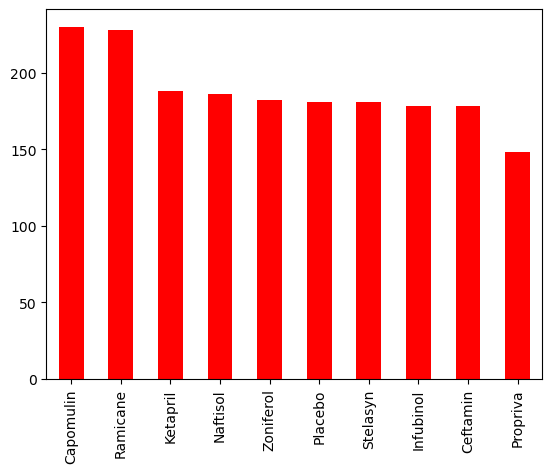

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# the plt.xlabel,title, and ylabel wont work for some reason. I'm pretty sure that is the correct sytax.

drug_reg_valcounts = cleaned_df['Drug Regimen'].value_counts()
pandas_bar_chart= drug_reg_valcounts.plot.bar(color='red')
# plt.xlabel('Drug Regimens')
# plt.ylabel("Number of Observed Mouse Timepoints")
# plt.title("Mouse ID/Timepoints per Drug Regimen")




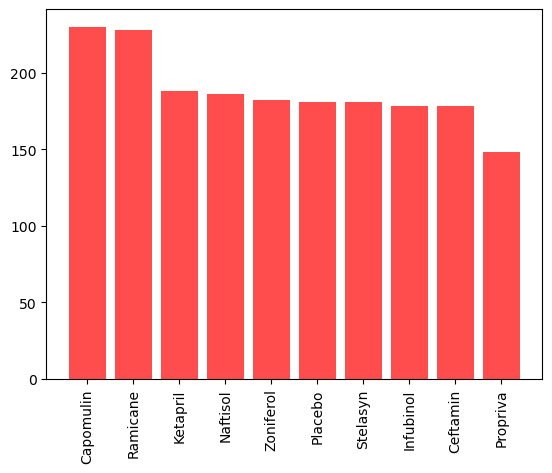

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=drug_reg_valcounts.index.values
y_axis=drug_reg_valcounts.values

plt.bar(x_axis, y_axis, color='red', alpha=0.7, align='center')

# plt.title("Number of Mice Tester per Treatment")

plt.xticks(rotation = "vertical")
plt.show()

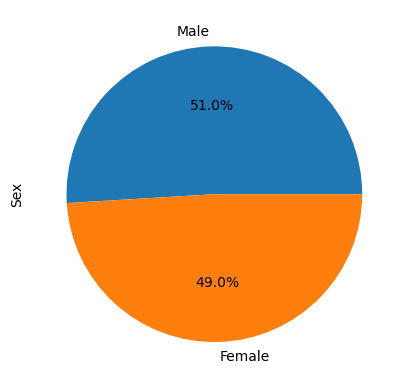

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = cleaned_df['Sex'].value_counts()
# plt.title("Male vs. Female")
male_female.plot.pie(autopct="%1.1f%%")
plt.show()




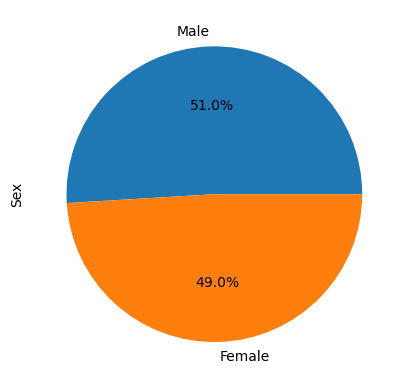

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels = ['Female', 'Male']
sizes= [49.79, 50.21]
plot = male_female.plot.pie(y='Total Count', autopct="%1.1f%%")
# plt.title("Male vs Female")
plt.show()




In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin" ,:]
# ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Ramicane" ,:]
# infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Infubinol" ,:]
# ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Ceftamin" ,:]

In [53]:
last_tumor_df=cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()
last_tumor_df = last_tumor_df.reset_index()

#merge
merged_data_last = last_tumor_df.merge(cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

In [58]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_tumor=merged_data_last.loc[merged_data_last['Drug Regimen']== drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(last_tumor)
    
    
    quartiles=last_tumor.quantile([0.25,0.5,0.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    mean=last_tumor.mean()
    iqr = upperq-lowerq
    lower_bound= lowerq -(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    
    
    outliers = last_tumor.loc[(last_tumor < lower_bound) | (last_tumor > upper_bound)]


   # Determine outliers using upper and lower bounds 
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


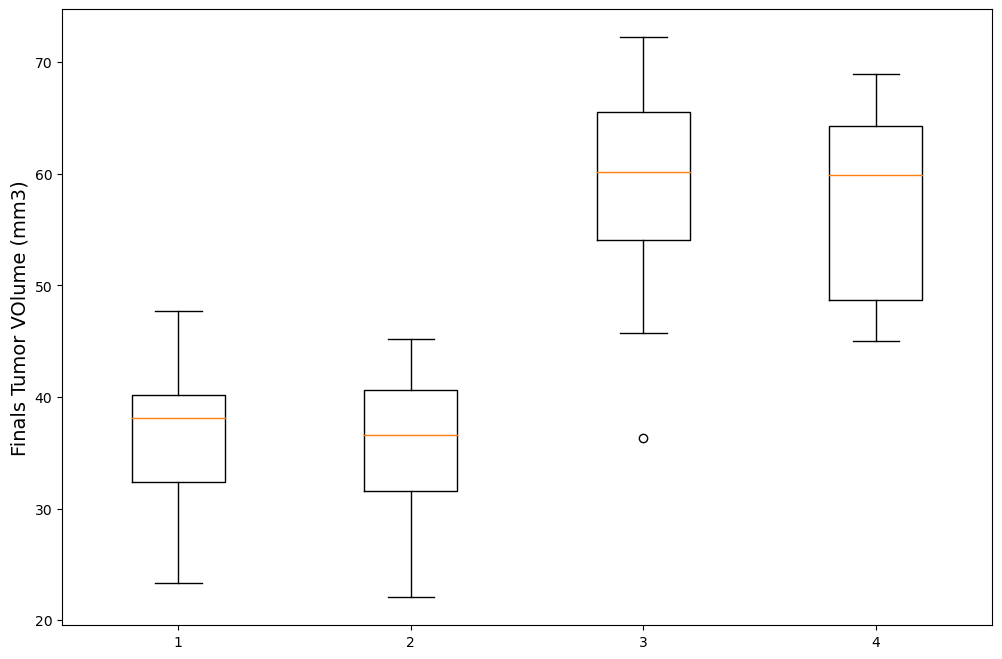

In [62]:
# generate a box plot of he finaltumor volus of each mouse
fig1, ax1=plt.subplots(figsize=(12,8))
ax1.set_ylabel('Finals Tumor VOlume (mm3)', fontsize = 14)
ax1.boxplot(tumor_vol_list, widths = 0.4, vert=True)

plt.show()




# Line and Scatter plots

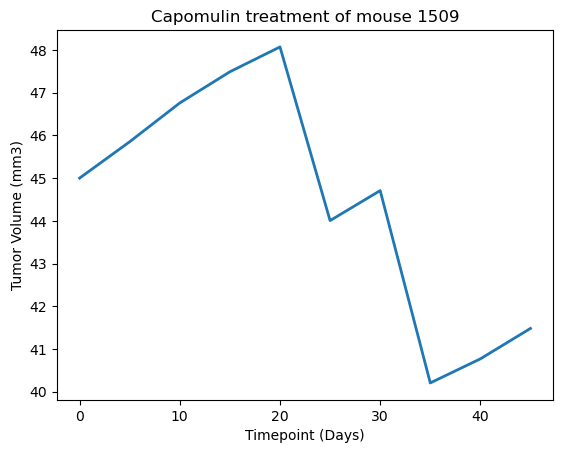

In [66]:

capomulin_df = merged_df.loc[merged_df['Drug Regimen']=='Capomulin',:]
capomulin_df

mouse_in_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"]=="l509",:]
mouse_in_capomulin

x_axisTP = mouse_in_capomulin['Timepoint']
tumsiz = mouse_in_capomulin['Tumor Volume (mm3)']

plt.title('Capomulin treatment of mouse 1509')
plt.plot(x_axisTP, tumsiz, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()





/var/folders/2l/mxwrd01n6c5dt1svt56qthqm0000gn/T/ipykernel_13531/151895399.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capavg = capomulin_df.groupby(['Mouse ID']).mean()


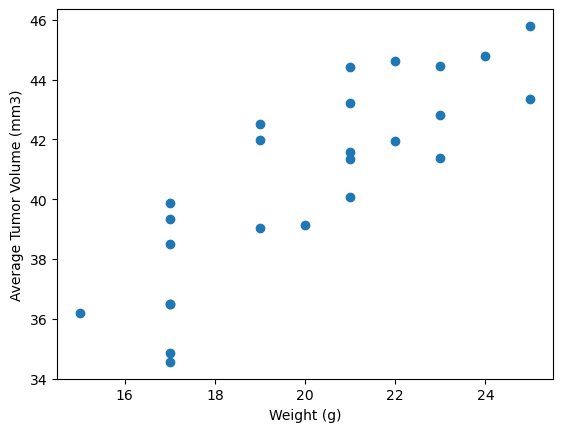

In [68]:
capavg = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# plt.savefig('scatterplot')
plt.show()


# Correlation and Regression

In [70]:
model=st.linregress(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241047, intercept=21.55216053268501, rvalue=0.841936342469472, pvalue=1.3225722434712478e-07, stderr=0.12754359033201326, intercept_stderr=2.590987686768347)

In [71]:
mslope = 0.9544396890241047
bintercept = 21.55216053268501

The correlation between mouse weight and average tumor volume is 0.84


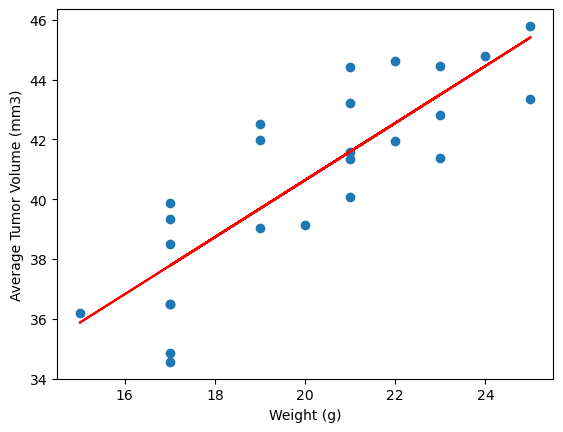

In [74]:
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'], y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
corr=round(st.pearsonr(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])[0],2)

print(f"The correlation between mouse weight and average tumor volume is {corr}")
